# CASE STUDY: FASHION CLASS CLASSIFICATION

# STEP 01: PROBLEM STATEMENTAND BUSINESS CASE

Fashion training set consist of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consist of 28x28 graysacel imamge, associeated with a label from 10 classes

The classes area as follows:
- 0 => Shirt/Top
- 1 => Trouser
- 2 => Pullover
- 3 => Dress
- 4 => Coat
- 5 => Sandal
- 6 => Shirt
- 7 => Sneaker
- 8 => Bag
- 9 => Ankle Boot

Each image is 28 pixels in heigh and 28 in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel with higher numers meaning darker.

# STEP 02: IMPORTING THE DATA


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read csv file 
fashion_train_db = pd.read_csv('../data/Fashion_mnist_datasets/fashion-mnist_train.csv', sep=',')
fashion_test_db = pd.read_csv('../data/Fashion_mnist_datasets/fashion-mnist_test.csv', sep=',')

# STEP 03: DATA VISUALIZATION

## Eplore the trainning data Set

In [3]:
fashion_train_db.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
fashion_train_db.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_train_db.shape

(60000, 785)

## Eplore the testing Data Set

In [6]:
fashion_test_db.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
fashion_test_db.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [8]:
fashion_test_db.shape

(10000, 785)

In [9]:
training = np.array(fashion_train_db, dtype='float32')

In [10]:
testing = np.array(fashion_test_db, dtype='float32')

## Visualize an image

category: 5.0


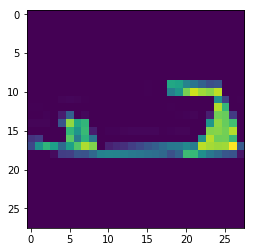

In [11]:
import random
i = random.randint(1, 60000)
plt.imshow(training[i,1:].reshape(28,28))
# now we will display the label
label = training[i, 0]
print("category: {0}".format(label.__str__()))

## View the data in a matrix form

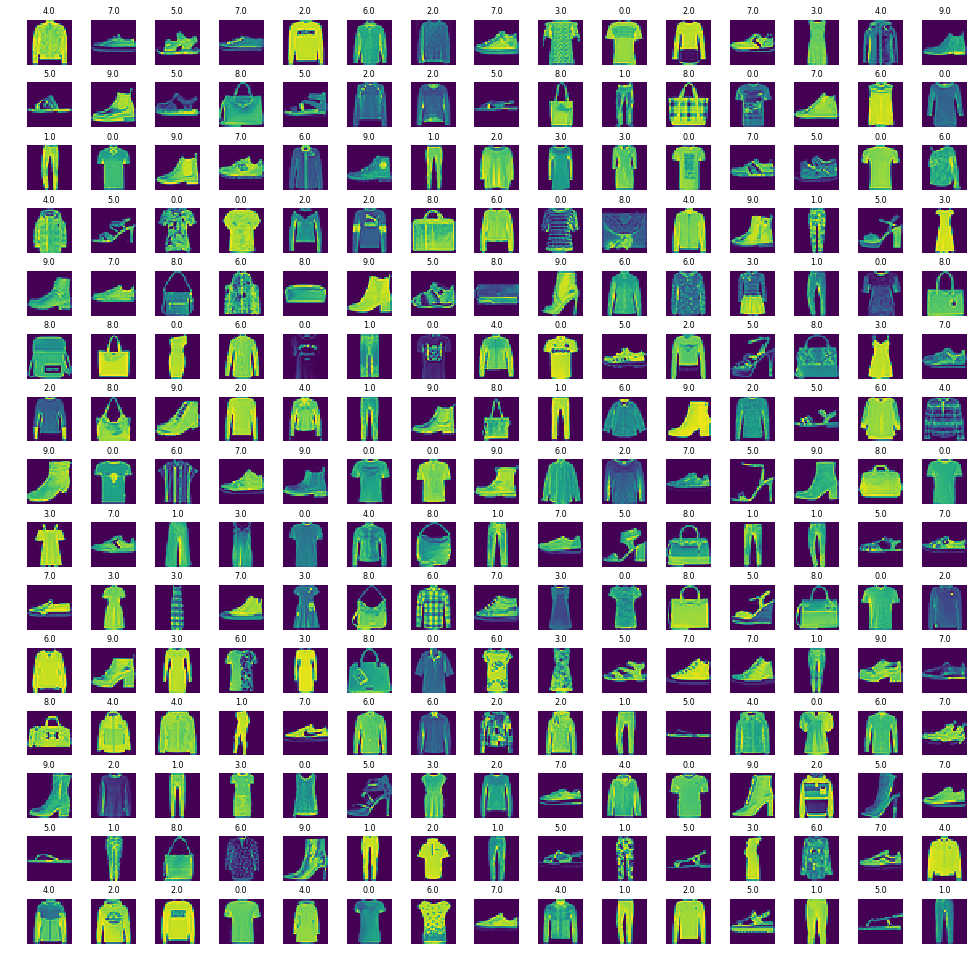

In [12]:
# Lets view more images in a grid format
# Define the dimensions of the plot grid
W_grid = 15
L_grid = 15

# fig, axes, = plt.subplots(L_grid, W_grid)
# subplot returns the figures object and axes object
# we can use the axes object to plot specific figures at various locations
fig, axes, = plt.subplots(L_grid, W_grid, figsize=(17,17))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the lenght of the training dataset


# Select a random number from 0 to n_training
for i in np.arange(0, L_grid * W_grid): # create evenly spaces variables
    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display and image with the selected index
    axes[i].imshow(training[index, 1:].reshape((28,28)))
    axes[i].set_title(training[index, 0], fontsize=8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

# STEP 04: TRAINNING THE MDOEL

In [13]:
x_train = training[:, 1:]/255
y_train = training[:, 0]

In [14]:
x_test = testing[:, 1:]/255
y_test = testing[:, 0]

In [15]:
# validation dataset to use during trainning to make a generalize model
from sklearn.model_selection import train_test_split

In [16]:
# use the train splits 
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.2, random_state=12345)

In [17]:
# take our training, testing and validation to reshape
x_train = x_train.reshape(x_train.shape[0], *(28, 28, 1))
x_test = x_test.reshape(x_test.shape[0], *(28, 28, 1))
x_validate = x_validate.reshape(x_validate.shape[0], *(28, 28, 1))

In [18]:
# now we will be using keras
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [30]:
# run cnn model 
cnn_model = Sequential()

In [33]:
# specifiy the number of kernels
cnn_model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))

In [34]:
# specify pooling layers
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

In [35]:
# flat our model
cnn_model.add(Flatten())

In [40]:
# Specify dimensions
cnn_model.add(Dense(output_dim=32, activation="relu"))

/home/ospcx/anaconda3/envs/pydl/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  


In [46]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [47]:
epochs = 50

In [49]:
cnn_model.fit(x_train,
              y_train,
              batch_size=512,
              nb_epoch=epochs,
              verbose=1,
              validation_data=(x_validate, y_validate))

/home/ospcx/anaconda3/envs/pydl/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 138s 3ms/step - loss: 3.3279 - acc: 0.2206 - val_loss: 3.4657 - val_acc: 0.0979
Epoch 2/50
48000/48000 [==============================] - 158s 3ms/step - loss: 3.4657 - acc: 0.1005 - val_loss: 3.4657 - val_acc: 0.0979
Epoch 3/50
48000/48000 [==============================] - 129s 3ms/step - loss: 3.4657 - acc: 0.1005 - val_loss: 3.4657 - val_acc: 0.0979
Epoch 4/50
15360/48000 [========>.....................] - ETA: 1:20 - loss: 3.4657 - acc: 0.1025

KeyboardInterrupt: 

# Step 05: EVALUATING THE MODEL

In [51]:
evaluation = cnn_model.evaluate(x_test, y_test)
print("Test Accuracy: {:.3f}".format(evaluation[1]))

10000/10000 [==============================] - 10s 998us/step


AttributeError: 'str' object has no attribute 'fformat'

In [55]:
# Use confusion matrix
predicted_classes = cnn_model.predict_classes(x_test)
predicted_classes

array([0, 0, 0, ..., 0, 0, 0])

TypeError: 'AxesSubplot' object is not callable

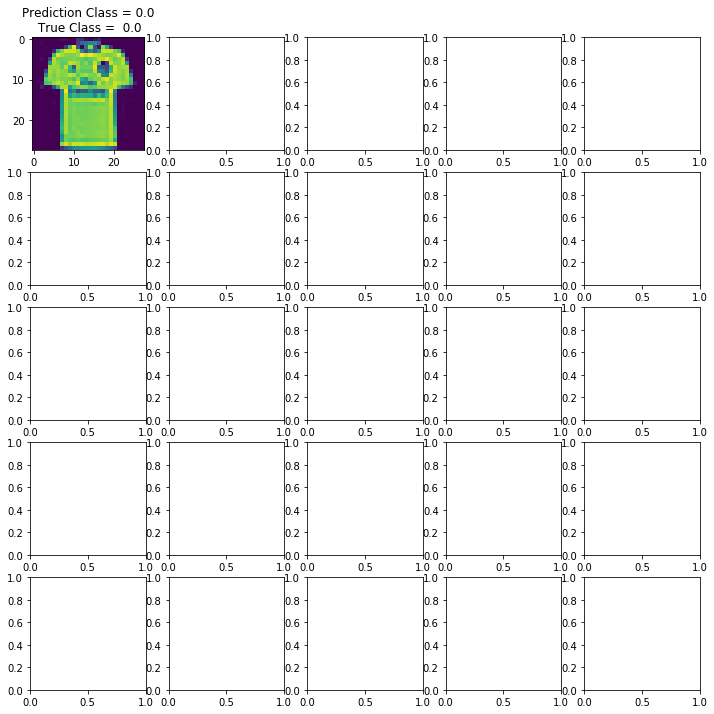

In [56]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize=(12,12))
axes = axes.ravel() # 

for i in np.arange(0,L * W):
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.01f}\n True Class =  {:0.01f}".format(predicted_classes[i],y_test[i]))
    axes[i].axes('off')
plt.subplots_adjust(w_space=0.5)

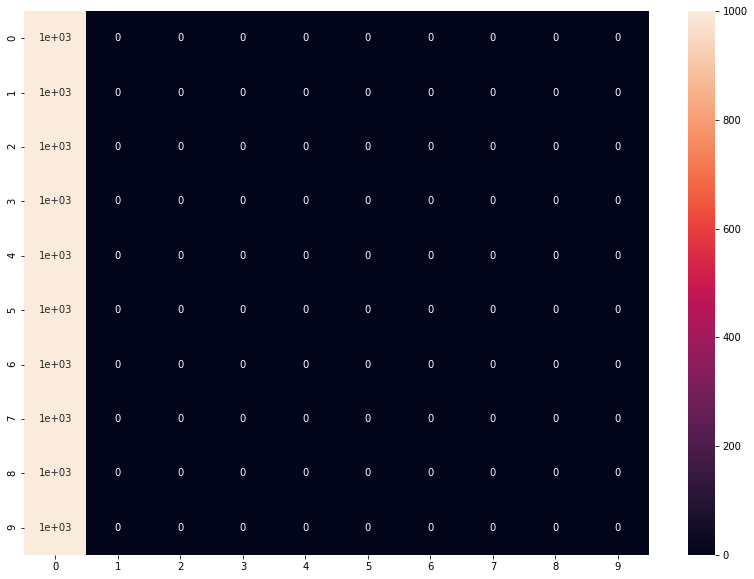

In [57]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot=True)
# Sum diagonal element to get the total of tru correct values

In [58]:
from sklearn.metrics import classification_report
num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.10      1.00      0.18      1000
     Class 1       0.00      0.00      0.00      1000
     Class 2       0.00      0.00      0.00      1000
     Class 3       0.00      0.00      0.00      1000
     Class 4       0.00      0.00      0.00      1000
     Class 5       0.00      0.00      0.00      1000
     Class 6       0.00      0.00      0.00      1000
     Class 7       0.00      0.00      0.00      1000
     Class 8       0.00      0.00      0.00      1000
     Class 9       0.00      0.00      0.00      1000

   micro avg       0.10      0.10      0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/home/ospcx/anaconda3/envs/pydl/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ospcx/anaconda3/envs/pydl/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ospcx/anaconda3/envs/pydl/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
